# Heart Disease Classification

The goal is to detect the presence or absence of cardiovascular disease in person based on the given features.

10/18/2020

---

In [2]:
# Import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Import data

os.chdir('//Users/mareksturek/Documents/GitHub/real-application/data')
cardio_df = pd.read_csv('cardio_train.csv', sep=";")
cardio_df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


Available features are:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [4]:
# Summary of the dataframe

cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Data pre-processing

cardio_df.isnull().sum()
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
cardio_df = cardio_df.drop(columns = 'id')
cardio_df['age'] = cardio_df['age']/365
cardio_df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1


<AxesSubplot:xlabel='weight', ylabel='Density'>

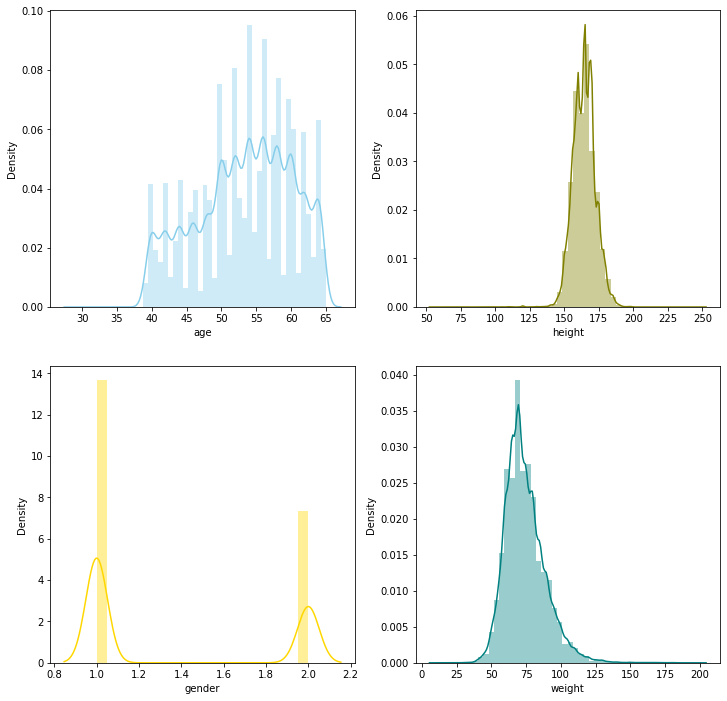

In [7]:
# Quick visualization

import warnings
warnings.filterwarnings("ignore")

f, axes = plt.subplots(2,2, figsize=(12, 12))
sns.distplot( cardio_df["age"] , color="skyblue", ax=axes[0, 0])
sns.distplot( cardio_df["height"] , color="olive", ax=axes[0, 1])
sns.distplot( cardio_df["gender"] , color="gold", ax=axes[1, 0])
sns.distplot( cardio_df["weight"] , color="teal", ax=axes[1, 1])

# cardio_df.hist(bins = 30, figsize = (20,20), color = 'b')

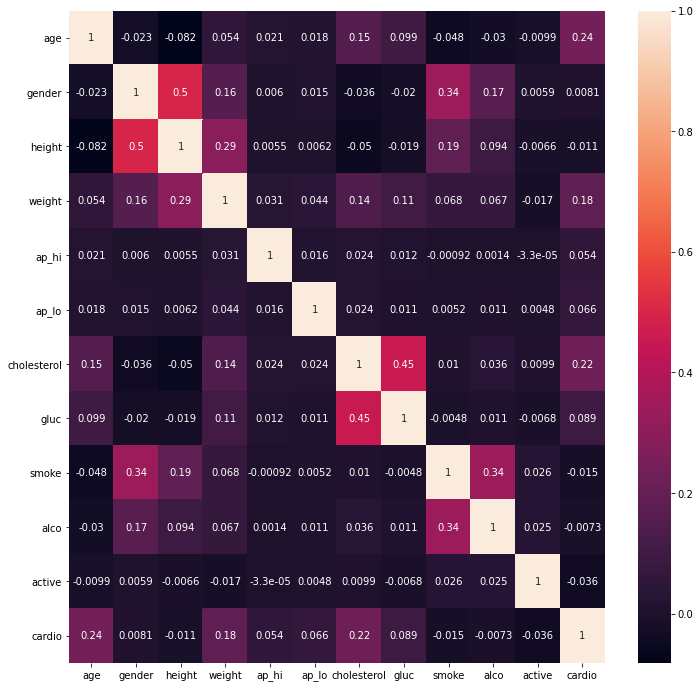

In [8]:
# Correlation matrix

corr_matrix = cardio_df.corr()

plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

---

## Build and train an Artificial Neural Network (ANN) model 

In [18]:
cardio_df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1


In [19]:
# Split dataframe into Target and Features

y = cardio_df['cardio']
X = cardio_df.drop(columns = ['cardio'])

In [20]:
# Feature scaling is a must in ANN

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
# Spliting data into test and train sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
# Build ANN

# Classifier

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(11, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               4800      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_14 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 401       
Total params: 326,001
Trainable params: 326,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compiler 

classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [25]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.5857 - accuracy: 0.7104
Epoch 2/10
1750/1750 [==============================] - 18s 10ms/step - loss: 0.5557 - accuracy: 0.7287
Epoch 3/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.5485 - accuracy: 0.7321
Epoch 4/10
1750/1750 [==============================] - 18s 10ms/step - loss: 0.5468 - accuracy: 0.7328
Epoch 5/10
1750/1750 [==============================] - 18s 10ms/step - loss: 0.5452 - accuracy: 0.7326
Epoch 6/10
1750/1750 [==============================] - 20s 11ms/step - loss: 0.5441 - accuracy: 0.7340
Epoch 7/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.5437 - accuracy: 0.7338
Epoch 8/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.5430 - accuracy: 0.7338
Epoch 9/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5426 - accuracy: 0.7340
Epoch 10/10
1750/1750 [==============================] - 6s 4ms/step -

In [32]:
# Prediction > 0.5 (False, True)

y_pred = classifier.predict(X_test)
y_pred
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

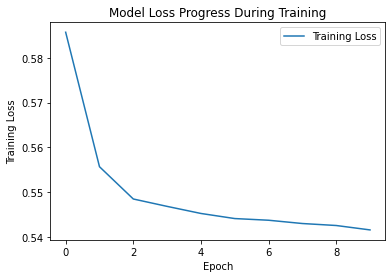

In [34]:
# Evaluation of ANN

epochs_hist.history.keys()

plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

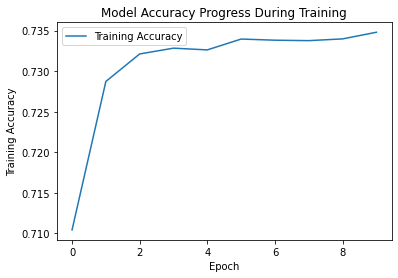

In [35]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<AxesSubplot:>

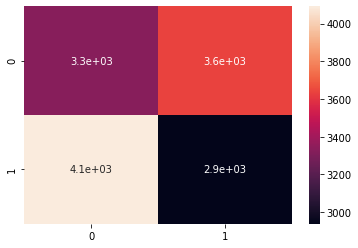

In [38]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [39]:
# Classification report 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46      6971
           1       0.45      0.42      0.43      7029

    accuracy                           0.45     14000
   macro avg       0.45      0.45      0.45     14000
weighted avg       0.45      0.45      0.45     14000



---

## Build and train an XGBOOST Classifier model 

In [46]:
from xgboost import XGBClassifier

# Build XGBOOST 
# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# Make predictions on test data

predict = model.predict(X_test)
predict

array([0, 1, 1, ..., 1, 0, 1])

<AxesSubplot:>

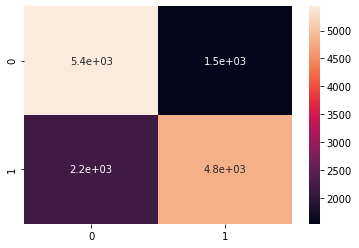

In [49]:
# Confusion matrix

cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

In [50]:
# Classification report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6971
           1       0.76      0.69      0.72      7029

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



---

## Amazon SafeMaker Studio

In [3]:
"""
import sagemaker


# Creating Sagemaker session using Sagemaker SDK
sess = sagemaker.Session()

# Prefix that we want to use

prefix = 'sagemaker/autopilot/input'

# Uploading the data to S3 bucket
uri = sess.upload_data(path = 'cardio_data.csv', key_prefix = prefix)

print(uri)
"""

"\nimport sagemaker\n\n\n# Creating Sagemaker session using Sagemaker SDK\nsess = sagemaker.Session()\n\n# Prefix that we want to use\n\nprefix = 'sagemaker/autopilot/input'\n\n# Uploading the data to S3 bucket\nuri = sess.upload_data(path = 'cardio_data.csv', key_prefix = prefix)\n\nprint(uri)\n"

In [4]:
"""
# Location to store the output

output = 's3://sagemaker-us-east-1-126821927778/sagemaker/autopilot/output'
print(output)
"""

"\n# Location to store the output\n\noutput = 's3://sagemaker-us-east-1-126821927778/sagemaker/autopilot/output'\nprint(output)\n"